<a href="https://colab.research.google.com/github/Raudhil/Machine-Learning-2025/blob/main/UTS/UTS_2341720164_RAUDHIL_FIRDAUS_NAUFAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS STUDI KASUS PEMBELAJARAN MESIN Clustering dan Approximate Nearest Neighbor (ANN)**

#SOAL

**Deskripsi Umum:**

Tugas kali ini adalah mengerjakan studi kasus analisis data dan clustering menggunakan
unsupervised learning dengan langkah-langkah sebagai berikut:

1. Preprocessing data

- Tangani missing values (imputasi mean/median/modus sesuai jenis data)
- Normalisasi atau standarisasi data
- Buat minimal satu fitur baru hasil kombinasi fitur lama


2. Clustering
- Terapkan K-Means dan DBSCAN
- Bandingkan hasil clustering menggunakan:
  - Silhouette Score
  - Davies–Bouldin Index

3. Approximate Nearest Neighbor (ANN)
- Gunakan Annoy untuk mencari tetangga terdekat dari beberapa query points
hasil clustering
- Tampilkan output berupa:
  - Index query point
  - Daftar tetangga terdekat yang ditemukan
  - Nilai jarak kemiripan


Tugas 2 — Credit Card Dataset
Untuk mahasiswa dengan nomor absen 2, 5, 8, dst.
- Dataset: Credit Card Dataset for Clustering
- Deskripsi: Dataset ini berisi data perilaku pengguna kartu kredit. Gunakan untuk
menemukan kelompok pelanggan berdasarkan pola penggunaan.
- Langkah tambahan:
  - Tangani missing values dan normalisasi fitur numerik.
  - Buat fitur baru seperti rasio antara BALANCE dan PURCHASES.



---





#JAWABAN

Download Alloy

In [20]:
!pip install annoy

Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import kagglehub

Import Dataset dari Kaggle

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arjunbhasin2013/ccdata")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ccdata' dataset.
Path to dataset files: /kaggle/input/ccdata


---

**Penjelasan Singkat**

Dataset

In [23]:
df = pd.read_csv(f'{path}/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [24]:
df.shape

(8950, 18)

Dataset memiliki 18 Fitur dan 8950 Sampel, dengan Tipe data setiap fitur di bawah ini

In [25]:
df.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [27]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


---

**Preprocessing**

Cek Nilai Missing Value

In [28]:
print(df.isnull().sum())


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


- Fitur yang memiliki Missing Values adalah Credit_Limit dan Minimum_Payments

Menghapus Kolom Cust_ID

In [29]:
df = df.drop(columns=['CUST_ID'])

Mengisi Missing Value dengan mean

In [30]:
df = df.fillna(df.mean())

In [31]:
print(df.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


Menambah Fitur Baru yaitu Rasio Antara Balance dan Purchases

In [32]:
df['BALANCE_PURCHASE_RATIO'] = df['BALANCE'] / (df['PURCHASES'] + 1)

In [33]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_PURCHASE_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.424282
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3202.467416
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3.222999
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1.111114
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,48.100843


Normalisasi dengan Standart Scaler

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [35]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_PURCHASE_RATIO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.424282
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3202.467416
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3.222999
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1.111114
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,48.100843


---

**Clustering K-Means dan DBScan**

K-means

k=2, Silhouette=0.1968, Davies–Bouldin=1.9398
k=3, Silhouette=0.1737, Davies–Bouldin=1.7800
k=4, Silhouette=0.1863, Davies–Bouldin=1.6129
k=5, Silhouette=0.1804, Davies–Bouldin=1.5821
k=6, Silhouette=0.1867, Davies–Bouldin=1.5431
k=7, Silhouette=0.1823, Davies–Bouldin=1.5091
k=8, Silhouette=0.1915, Davies–Bouldin=1.5332
k=9, Silhouette=0.1993, Davies–Bouldin=1.4971
k=10, Silhouette=0.2023, Davies–Bouldin=1.4107


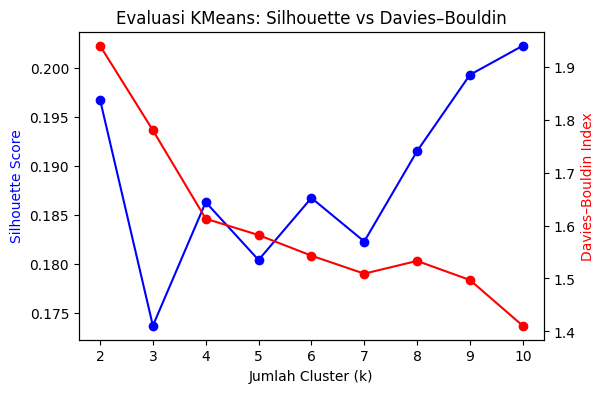


Cluster terbaik berdasarkan Silhouette Score = 10


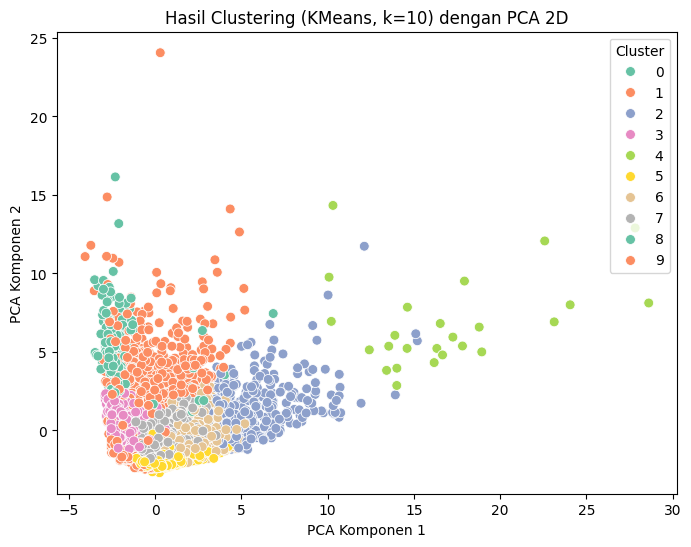

In [45]:
sil_scores = []
db_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    sil_scores.append(sil)
    db_scores.append(db)
    print(f"k={k}, Silhouette={sil:.4f}, Davies–Bouldin={db:.4f}")

fig, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(K, sil_scores, 'bo-', label='Silhouette Score')
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('Silhouette Score', color='b')
ax2 = ax1.twinx()
ax2.plot(K, db_scores, 'ro-', label='Davies–Bouldin Index')
ax2.set_ylabel('Davies–Bouldin Index', color='r')
plt.title("Evaluasi KMeans: Silhouette vs Davies–Bouldin")
plt.show()

best_k = K[sil_scores.index(max(sil_scores))]
print(f"\nCluster terbaik berdasarkan Silhouette Score = {best_k}")

kmeans_best = KMeans(n_clusters=best_k, random_state=42)
labels_best = kmeans_best.fit_predict(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_best, palette="Set2", s=50)
plt.title(f"Hasil Clustering (KMeans, k={best_k}) dengan PCA 2D")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title="Cluster")
plt.show()

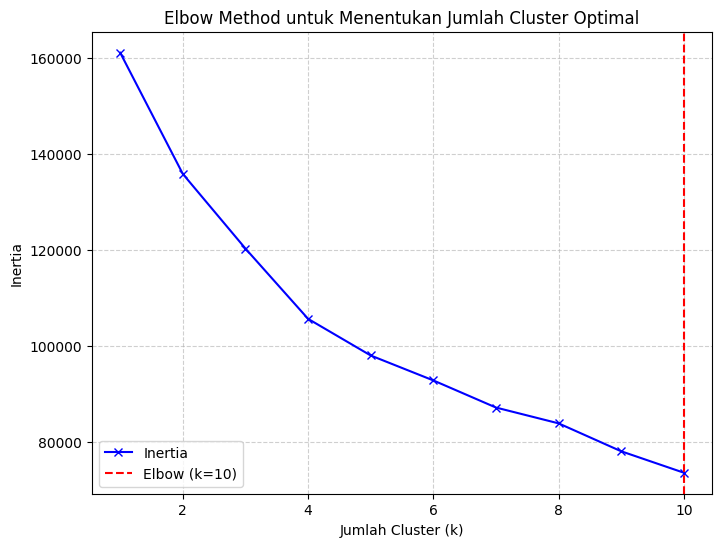

In [50]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-', label='Inertia')

best_k = 10
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Elbow (k={best_k})')

plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


DBSCAN

Jumlah cluster yang terbentuk oleh DBSCAN: 7
Silhouette Score (DBSCAN): -0.0108
Davies–Bouldin Index (DBSCAN): 1.8557


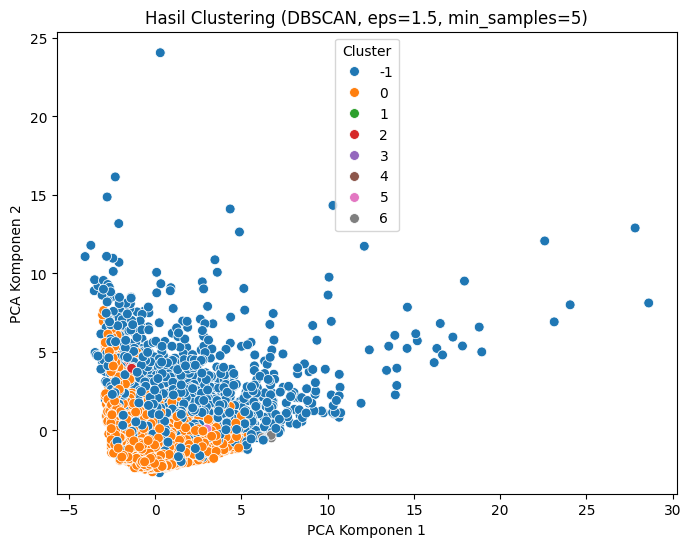

In [40]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels_db = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
print(f"Jumlah cluster yang terbentuk oleh DBSCAN: {n_clusters}")

if n_clusters > 1:
    sil_db = silhouette_score(X_scaled, labels_db)
    dbi_db = davies_bouldin_score(X_scaled, labels_db)
    print(f"Silhouette Score (DBSCAN): {sil_db:.4f}")
    print(f"Davies–Bouldin Index (DBSCAN): {dbi_db:.4f}")
else:
    print("DBSCAN hanya membentuk 1 cluster atau semuanya dianggap noise, tidak bisa hitung Silhouette/DBI.")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_db, palette="tab10", s=50)
plt.title(f"Hasil Clustering (DBSCAN, eps=1.5, min_samples=5)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.legend(title="Cluster", loc="best")
plt.show()


ANN

In [43]:
X_array = X_scaled

dim = X_array.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

for i, v in enumerate(X_array):
    ann.add_item(i, v)

ann.build(10)

query_idx = 42
neighbors, distances = ann.get_nns_by_item(query_idx, 5, include_distances=True)

print(f"Query Point Index: {query_idx}")
print(f"Cluster (KMeans): {labels_best[query_idx]}")
print("\nNearest Neighbors and Distances:")
for n, d in zip(neighbors, distances):
    print(f"Neighbor Index: {n} | Distance: {d:.4f} | Cluster (KMeans): {labels_best[n]}")

Query Point Index: 42
Cluster (KMeans): 3

Nearest Neighbors and Distances:
Neighbor Index: 42 | Distance: 0.0000 | Cluster (KMeans): 3
Neighbor Index: 3086 | Distance: 0.3225 | Cluster (KMeans): 3
Neighbor Index: 88 | Distance: 0.5901 | Cluster (KMeans): 3
Neighbor Index: 3478 | Distance: 0.6410 | Cluster (KMeans): 3
Neighbor Index: 3900 | Distance: 0.6755 | Cluster (KMeans): 3


---

Kesimpulan

a. Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini
dan jelaskan jawaban anda


Yang lebih baik adalah K-Means, karena k means membagikan cluster lalu dicari cluster yang terbaik, pada kode juga didapatkan hasil k=10 dengan silhouette score 0.2023 dan DBI 1.4107 yang artinya cluster lumayan terpisah dan lumayan kompak. Sementara itu DBSCAN lebih cocok untuk data yang tidak beraturan dan banyak noise, tetapi dari haisl DBSCAN terlihat nilai silhouette score sebesar -0.0108 dan DBI = 1.8557 yang artinya data tidak punya pola density yang jelas

b. Nilai metrik terbaik (Silhouette, DBI).


Nilai Metrik terbaik adalah milik Kmeans, karena kedua hasil dari silhouette score dan DBI dari kmeans lebih baik daripada milik DBSCAN

c. Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang
sama? Jelaskan jawaban anda.

Ya, semua tetangga yang ditemukan termasuk dalam tetangga yang sama, menunjukkan kalau hasil clustering Kmeans konsisten dengan hubungan kedekatan antar fitur, yang artinya pemisahan yang dilakukan oleh kmeans cukup representatif terhadap struktur antar data.